In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!unzip /content/Clay_items.v1i.yolov11.zip -d /content/

Archive:  /content/Clay_items.v1i.yolov11.zip
  inflating: /content/README.dataset.txt  
  inflating: /content/README.roboflow.txt  
  inflating: /content/data.yaml      
   creating: /content/train/
   creating: /content/train/images/
 extracting: /content/train/images/cookingpots_001_jpg.rf.a5a62d7164e21bb399908fdc4333aa6a.jpg  
 extracting: /content/train/images/cookingpots_002_jpeg.rf.d21b984c81f637dd9430271f3c1c7c6f.jpg  
 extracting: /content/train/images/cookingpots_003_jpg.rf.60150f2f89e97a3f2719453aed6383ef.jpg  
 extracting: /content/train/images/cookingpots_004_jpg.rf.fb98b5dc0e1795fda50e7bf4de8ed5c6.jpg  
 extracting: /content/train/images/cookingpots_005_jpg.rf.f75f517663d9fdaea147c1a4c83510eb.jpg  
 extracting: /content/train/images/cookingpots_006_jpg.rf.8074fb1d7f1259e0178dc3b27402df4b.jpg  
 extracting: /content/train/images/cookingpots_007_jpg.rf.1efa960c6b322e7c2596a14fab327cc6.jpg  
 extracting: /content/train/images/cookingpots_008_jpg.rf.2f9db3ab0fb97e30812aa243d6

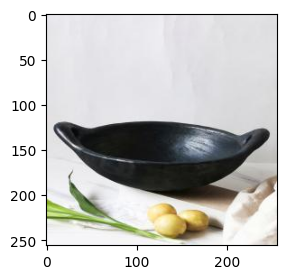

Website Part: object


In [ ]:
sampleimg = mpimg.imread("/content/train/images/cookingpots_001_jpg.rf.a5a62d7164e21bb399908fdc4333aa6a.jpg")
plt.figure(figsize=(3,3))
plt.imshow(sampleimg)
plt.show()

# Annotation
sampleannotfile = open("/content/train/labels/cookingpots_001_jpg.rf.a5a62d7164e21bb399908fdc4333aa6a.txt")
indx = int(sampleannotfile.readlines()[0].split()[0].strip())
classes = ['object']
print("Website Part:", classes[indx])

In [ ]:
import shutil
import random

In [ ]:
labels_dir="/content/train/labels"
images_dir="/content/train/images"

In [ ]:
files=os.listdir(images_dir)
random.shuffle(files)

In [ ]:
folders={"train_y": 0.7, "val":0.1, "test": 0.2}

In [ ]:
#creating the folder names
for folder in folders:
    os.makedirs(os.path.join(folder, "images"), exist_ok=True)
    os.makedirs(os.path.join(folder, "labels"), exist_ok=True)

In [ ]:
lower_limit=0
total_files=len(files)
for folder,ratio in folders.items():
  limit=round(total_files*ratio)
  for file in files[lower_limit:lower_limit+limit]:
    file_name=os.path.splitext(file)[0]

    src_img=os.path.join(images_dir,file)
    dst_img=os.path.join(folder,"images",file)

    src_label=os.path.join(labels_dir,f"{file_name}.txt")
    dst_label=os.path.join(folder,"labels",f"{file_name}.txt")

    if os.path.exists(src_label):
      shutil.copyfile(src_img,dst_img)
      shutil.copyfile(src_label,dst_label)
  lower_limit += limit

In [ ]:
len(os.listdir("train_y/images"))

1015

In [ ]:
len(os.listdir("test/images"))

290

In [ ]:
len(os.listdir("val/images"))

145

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 401MB/s]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

model.train(data="/content/data.yaml", epochs=10)

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7.2±2.9 MB/s, size: 9.6 KB)


train: Scanning /content/train_y/labels... 1015 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1015/1015 [00:00<00:00, 1192.85it/s]

train: New cache created: /content/train_y/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.4±0.9 MB/s, size: 9.7 KB)


val: Scanning /content/val/labels... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<00:00, 647.99it/s]

val: New cache created: /content/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      11.7G      1.848      2.714      2.568          7        640: 100%|██████████| 64/64 [01:16<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        145        182          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      12.2G      2.297      2.286      2.915          8        640: 100%|██████████| 64/64 [01:19<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]

                   all        145        182          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      12.3G      2.257       2.24       2.86          7        640: 100%|██████████| 64/64 [01:19<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        145        182    0.00273      0.242    0.00168   0.000489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      12.3G      2.187      2.144      2.784          8        640: 100%|██████████| 64/64 [01:19<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        145        182     0.0205       0.22     0.0138    0.00374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      12.3G      2.167       2.04      2.722          7        640: 100%|██████████| 64/64 [01:19<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        145        182      0.222      0.357      0.132     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      12.5G      1.987       1.97      2.587          7        640: 100%|██████████| 64/64 [01:19<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        145        182      0.146      0.264     0.0745      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      12.3G       1.96      1.923      2.546          7        640: 100%|██████████| 64/64 [01:20<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        145        182      0.611      0.495      0.445      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      12.3G      1.885       1.87      2.496          7        640: 100%|██████████| 64/64 [01:20<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        145        182       0.67      0.527      0.539      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      12.3G       1.87      1.771      2.449          8        640: 100%|██████████| 64/64 [01:19<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        145        182      0.738      0.541      0.607      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      12.5G      1.763      1.755      2.362          7        640: 100%|██████████| 64/64 [01:19<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        145        182      0.671      0.538      0.526      0.267



10 epochs completed in 0.261 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


                   all        145        182      0.735      0.538      0.607      0.284
Speed: 0.3ms preprocess, 27.3ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db154ffb7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model.save('Clay_detection.pt')


image 1/1 /content/test/images/cookingpots_092_jpg.rf.d6aa5df433e8462ffc6766711a7af33a.jpg: 640x640 (no detections), 96.4ms
Speed: 2.7ms preprocess, 96.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


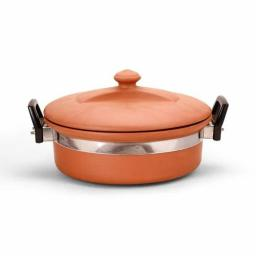

In [ ]:
results = model.predict("/content/test/images/cookingpots_092_jpg.rf.d6aa5df433e8462ffc6766711a7af33a.jpg", imgsz=640, conf=0.6)

# Show results (optional)
results[0].show()  # Open image with boxes


image 1/1 /content/train/images/cookingpots_017_jpg.rf.a11fbcae5382bf151c042e0347fd10b2.jpg: 640x640 1 objects, 96.5ms
Speed: 3.2ms preprocess, 96.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


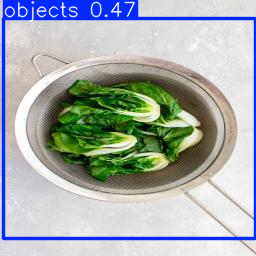

In [ ]:
results = model("/content/train/images/cookingpots_017_jpg.rf.a11fbcae5382bf151c042e0347fd10b2.jpg")

# Show results (optional)
results[0].show()  # Open image with boxes

In [ ]:
model2=YOLO('/content/yolov8x.pt')


image 1/1 /content/i.jpeg: 640x448 1 person, 70.2ms
Speed: 2.7ms preprocess, 70.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict2


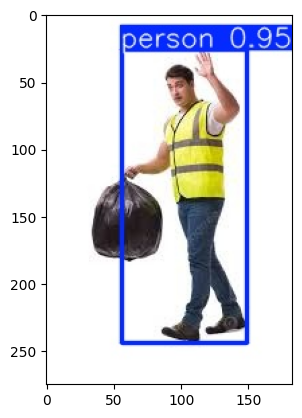

In [ ]:
results = model2.predict("/content/i.jpeg",save=True, imgsz=640, conf=0.4)
sample=mpimg.imread("/content/runs/detect/predict2/i.jpg")
plt.imshow(sample)